In [4]:
import numpy as np
from scipy.integrate import odeint

In [5]:
def model(y, t, alpha, beta, gamma):
    P, Q, C = y
    dPdt = alpha * (P - C)
    dQdt = beta * (P - C)
    dCdt = gamma * C
    return [dPdt, dQdt, dCdt]


In [31]:
# Initial conditions
y0 = [1.0, 1.0, 1.0]
y1 = [100000.0, 100000.0, 100000.0]

In [32]:
# Time points
t = np.linspace(0, 10)

In [33]:
# Parameters
alpha = 1.5
beta = 1.3
gamma = 1.5 

In [34]:
# Parameter options
alphas = [1.0, 2.0]
betas = [1.0, 1.6]
gammas = [1.0, 2.0]

In [35]:
# Parameter options, more extreme
alphas1 = [0.85, 4.0]
betas1 = [0.85, 4.0]
gammas1 = [0.85, 4.0]

In [36]:
# Solve ODEs
sol = odeint(model, y0, t, args=(alpha, beta, gamma))

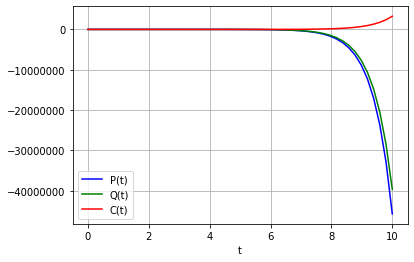

In [37]:
# Plot results
import matplotlib.pyplot as plt
plt.ticklabel_format(style='plain')
plt.plot(t, sol[:, 0], 'b', label='P(t)')
plt.plot(t, sol[:, 1], 'g', label='Q(t)')
plt.plot(t, sol[:, 2], 'r', label='C(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

In [43]:
sols=[]

In [44]:
for a in alphas1:
    for b in betas1:
        for g in gammas1:
            sol = odeint(model, y1, t, args=(a, b, g))
            sols.append(sol)
            #print(a, b, g)
            

In [45]:
all_alpha = [1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0]
all_beta= [1.0, 1.0, 1.6, 1.6, 1.0, 1.0, 1.6, 1.6]
all_gs = [1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0]

In [46]:
all_alpha1 = [0.85, 0.85, 0.85, 0.85, 4.0, 4.0, 4.0, 4.0]
all_beta1= [0.85, 0.85, 4.0, 0.85, 0.85, 4.0, 4.0, 4.0]
all_gs1 = [0.85, 4.0, 0.85, 4.0, 0.85, 4.0, 0.85, 4.0]

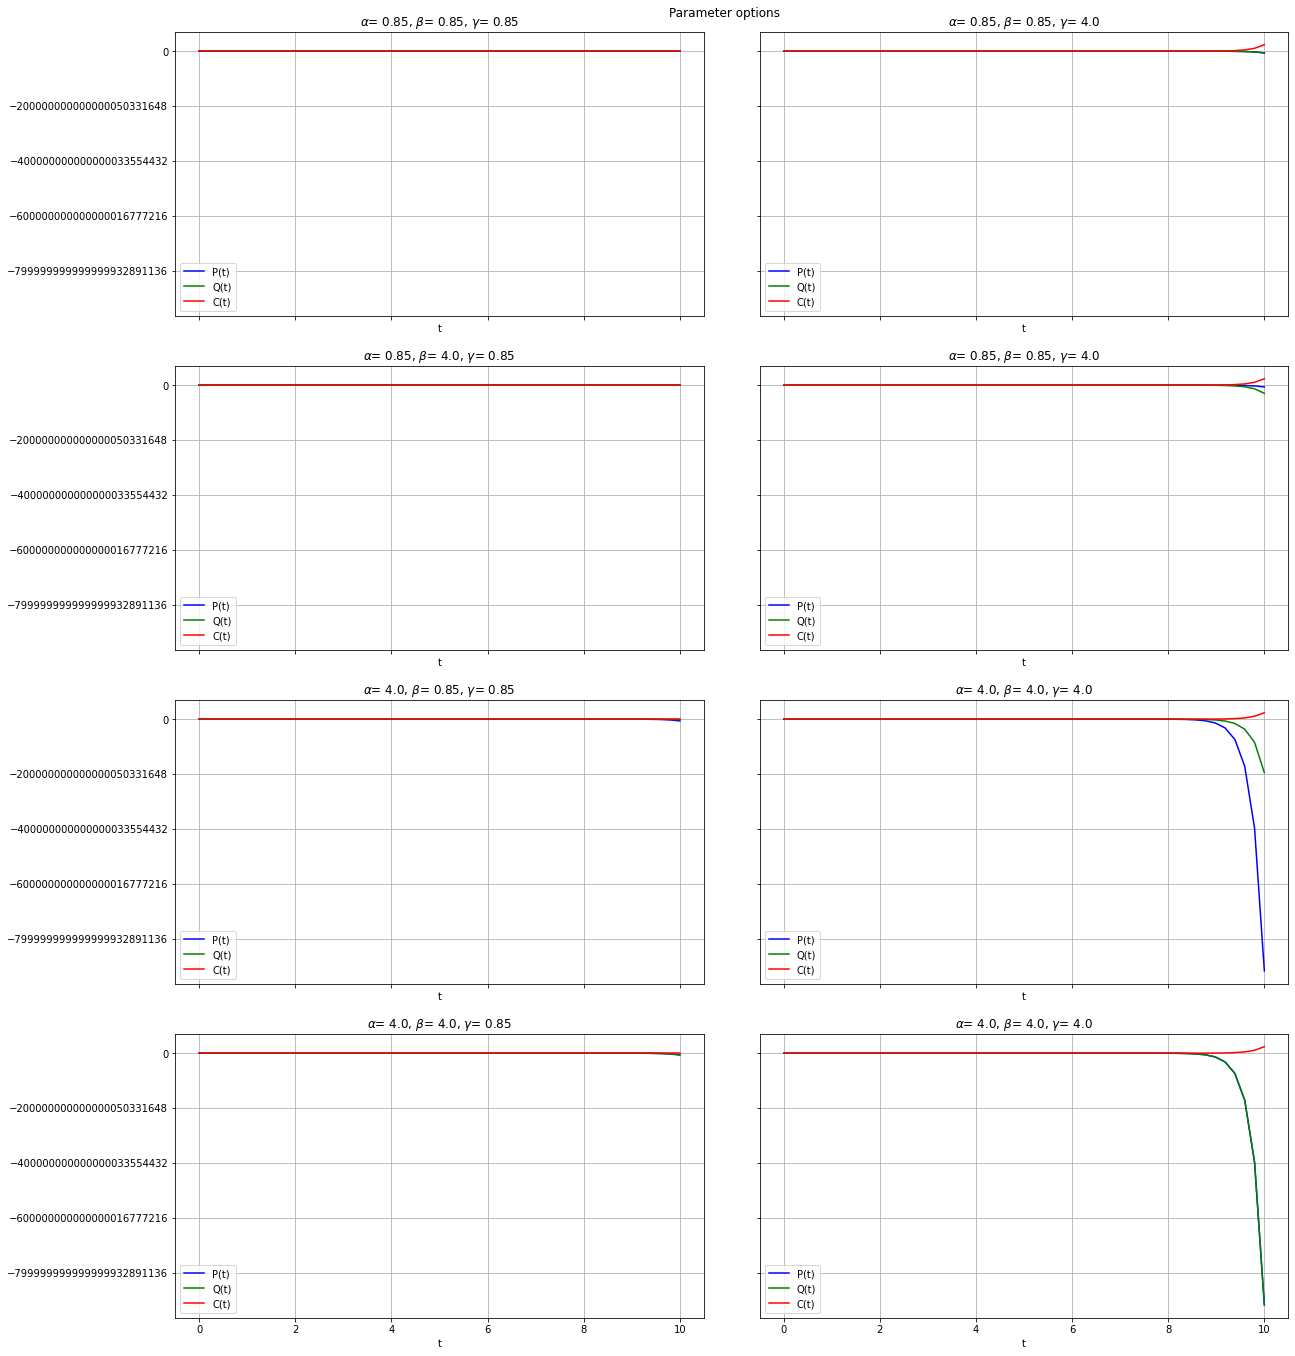

In [47]:
plt.subplots(4,2, figsize=(17,20), sharex=True, sharey=True)
plt.suptitle('Parameter options', x=0.5, y=0.95)
plt.tight_layout(pad=4)

for i in range(len(sols)):
    plt.subplot(4,2,i+1)
    plt.ticklabel_format(style='plain')
    plt.plot(t, sols[i][:, 0], 'b', label='P(t)')
    plt.plot(t, sols[i][:, 1], 'g', label='Q(t)')
    plt.plot(t, sols[i][:, 2], 'r', label='C(t)')
    plt.legend(loc='best')
    plt.title('$\\alpha$= {}, $\\beta$= {}, $\gamma$= {}'.format(all_alpha1[i], all_beta1[i], all_gs1[i]))
    plt.xlabel('t')
    plt.grid()
    
plt.savefig('Q7 Various Params.png')